# IMPORTANT NOTE:

### Please beware before rendering cells where simulation has been done. It might take upto 15 mins for getting the results.

### If the code needs to be verified, kindly change the iterations=desired_value and correspondingly gn=desired_value that will decide how many plots the user needs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
#Defining constants:

m_x = 2.207e-25 #kgs - mass of Xenon atom 
m_n = 3.351e-26 #kgs - mass of Neon atom

sigma_x = 1.08e-10 #m - radius of Xenon atom
sigma_n = 0.38e-10 #m - radius of Neon atom

#Gas Atoms

N = 120

N_x = int(N/2)
N_n = int(N/2)

In [3]:
# Defining initial position vectors for N/2 two atoms

d = 3*sigma_x
r_x = []
r_n = []

In [4]:
# Defining a function for initial positions

def initial_position(a, b):
    for i in range(20):
        if i < 5:
            rx_temp = [a + 2*i*d, a, b]
            r_x.append(rx_temp)
            rn_temp = [a + ((2*i)+1)*d, a, b]
            r_n.append(rn_temp)

        elif 5 <= i < 10:
            rx_temp = [a , a + 2*(i-5)*d, b]
            r_x.append(rx_temp)
            rn_temp = [a , a + (2*(i-5)+1)*d, b]
            r_n.append(rn_temp)

        elif 10 <= i < 15:
            rx_temp = [a + 10*d, a + 2*(i-10)*d, b]
            r_x.append(rx_temp)
            rn_temp = [a + 10*d, a + (2*(i-10)+1)*d, b]
            r_n.append(rn_temp) 

        else:
            rx_temp = [a + 2*(i-15)*d, a + 10*d, b]
            r_x.append(rx_temp)
            rn_temp = [a + (2*(i-15)+1)*d, a + 10*d, b]
            r_n.append(rn_temp)         

In [5]:
r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

In [6]:
# Check overlap

def distance(a, b):
    c = np.sqrt(np.square(a[0] - b[0]) + np.square(a[1] - b[1]) + np.square(a[2] - b[2]))
    return c

def overlap(x1, x2, r1, r2):
    olap_count = 0
    for elem1 in x1:
        for elem2 in x2:
            if np.array_equal(elem1, elem2):
                pass
            elif distance(elem1, elem2) <= r1 + r2:
                olap_count = olap_count+1
            else:
                pass
    if olap_count > 0:
        print("Overlap", olap_count)
    else:
        print("No Overlap: Congratulations!!!")
        pass

overlap(r_x, r_x, sigma_x, sigma_x)
overlap(r_n, r_n, sigma_n, sigma_n)
overlap(r_x, r_n, sigma_x, sigma_n)

No Overlap: Congratulations!!!
No Overlap: Congratulations!!!
No Overlap: Congratulations!!!


In [7]:
#Verifying how the atoms appear in grid

def plot_func(r_x, r_n):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="3d")

    i = 0

    for elem in r_x:
        ax.scatter(elem[0], elem[1], elem[2], marker="x", color="red", s=30, label="Xenon" if i == 0 else "")
        i = i + 1

    i = 0    
    for elem in r_n:
        ax.scatter(elem[0], elem[1], elem[2], marker="*", color="blue", s=30, label="Neon" if i == 0 else "")
        i = i + 1

    ax.legend(fontsize="x-large")
    ax.set_zlim3d(0, 6e-9)                    # viewrange for z-axis based on cube size
    ax.set_ylim3d(0, 6e-9)                    # viewrange for y-axis based on cube size
    ax.set_xlim3d(0, 6e-9)                    # viewrange for x-axis based on cube size 
    plt.show()

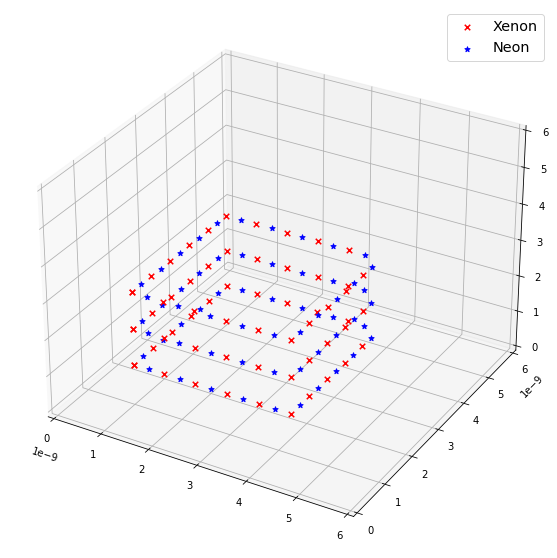

In [8]:
plot_func(r_x, r_n)

In [9]:
# Sampling velocities for different Temparature Values

# Defining a Maxwell - Boltzmann distribution function

# Following the exact same code as given in appendix to HW

def MB(v,T,mass):

    """" Maxwell Boltzmann distribution """
    kb = 1.38064852e-23
    if isinstance(v,(list,tuple,np.ndarray)): 
        N = v.shape[0]
        p = np.zeros(N)
        p = np.sqrt((mass/(2*np.pi*kb*T))**3) * 4*np.pi*v[:]**2 * np.exp( -mass*v[:]**2/(2*kb*T) )
    else :
        p = np.sqrt((mass/(2*np.pi*kb*T))**3) * 4*np.pi*v**2 * np.exp( -mass*v**2/(2*kb*T) )
    return p

In [10]:
def rand_MB(T,mass,Pmax,vmin,vmax):

    """" Function to extract a probability and velocity from the Maxwell-Boltzmann distribution 

         T - temperature in [K]
         mass - mass in [kg]
         Pmax - the probability cut off [unitless]
         vmin - minimum velocity for range in [m/s]
         vmax - maximum velocity for range in [m/s]
    """
    kb = 1.38064852e-23
    p=0
    v=0

    # Make sure input min velocity is > 0
    if vmin < 0:
        vmin = 0
        print("Setting vmin to zero as input vmin is < 0")

    while True :
        vrand = vmin + (vmax-vmin)*random.random();
        prob = Pmax*random.random();
        if prob < MB(vrand, T, mass) :
            p = prob
            v = vrand
            break

    return p, v

In [11]:
# Defining a function to extract velocity for atoms:

def velocity_extraction(N, mass, T):
    kb = 1.38064852e-23
    vmin = 0.
    vmax = 4000
    vvec = np.linspace(vmin,vmax,N)
    Pmax = np.max(MB(vvec,T,mass))
    vel_sample = []
    for i in range(0,N):
        vel_sample.append(rand_MB(T,mass,Pmax,vmin,vmax)[1])
    return vel_sample

In [12]:
# Extracting N/2 values of velocity of each set gas atoms at different temperatures

Temp = [60, 750, 2000] 

# At T = 60

v_n_60 = velocity_extraction(N_n, m_n, Temp[0])
v_x_60 = velocity_extraction(N_x, m_x, Temp[0])

# At T = 750

v_n_750 = velocity_extraction(N_n, m_n, Temp[1])
v_x_750 = velocity_extraction(N_x, m_x, Temp[1])

# At T = 2000

v_n_2000 = velocity_extraction(N_n, m_n, Temp[2])
v_x_2000 = velocity_extraction(N_x, m_x, Temp[2])

In [13]:
# Converting absolute velocities to vectors

def vector(temp_list): #For converting absolute Temperature to vector
    for i in range(len(temp_list)):
        v_r = np.random.random(3)
        mod = np.sqrt(np.square(v_r[0]) + np.square(v_r[1]) + np.square(v_r[2]))
        v_r = v_r/mod
        temp_list[i] = temp_list[i]*v_r
    return temp_list

v_n_60 = vector(v_n_60)
v_x_60 = vector(v_x_60)

v_n_750 = vector(v_n_750)
v_x_750 = vector(v_x_750)

v_n_2000 = vector(v_n_2000)
v_x_2000 = vector(v_x_2000)

In [14]:
def normal(vec):# When molecules collide with walls, this gives normal vector
    
    if vec[0] <= 0:
        norm = np.array([1, 0, 0])
    elif vec[0] >= 6e-9:
        norm = np.array([-1, 0, 0])
    elif vec[1] <= 0:
        norm = np.array([0, 1, 0])
    elif vec[1] >= 6e-9:
        norm = np.array([0, -1, 0])
    elif vec[2] <= 0:
        norm = np.array([0, 0, 1])
    else:
        norm = np.array([0, 0, -1])
    
    return norm

In [15]:
def unit_vector(a, b): # When atoms collide, this gives r_ij
    c = a - b
    mod = np.sqrt(np.square(c[0]) + np.square(c[1]) + np.square(c[2]))
    c = c/mod
    return c

def kinetic(v, m): # Total Kinetic Energy of one set of atoms
    K = np.zeros((len(v), 3))
    Energy = []
    for i in range(len(v)):
        K[i] = 0.5*(np.square(v[i]))*m
        E = K[i]
        E = np.sqrt(np.square(E[0]) + np.square(E[1]) + np.square(E[2]))
        Energy.append(E)
    return sum(Energy)    

In [16]:
def plot_func1(r_x, r_n, label):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="3d")

    i = 0

    for elem in r_x:
        ax.scatter(elem[0], elem[1], elem[2], marker="x", color="red", s=30, label="Xenon" if i == 0 else "")
        i = i + 1

    i = 0    
    for elem in r_n:
        ax.scatter(elem[0], elem[1], elem[2], marker="*", color="blue", s=30, label="Neon" if i == 0 else "")
        i = i + 1

    ax.legend(fontsize="x-large")
    ax.set_zlim3d(0, 6e-9)                    # viewrange for z-axis based on cube size
    ax.set_ylim3d(0, 6e-9)                    # viewrange for y-axis based on cube size
    ax.set_xlim3d(0, 6e-9)                    # viewrange for x-axis based on cube size 
    ax.set_title(label, fontsize=20)
    plt.show()
    
def velocity_plot(v_x_60, label, mol): # Plotting the velocty distribution after a particular iteration:
    v_abs = []
    for elem in v_x_60:
        absolute = np.sqrt(np.square(elem[0]) + np.square(elem[1]) + np.square(elem[2]))
        v_abs.append(absolute)
    plt.figure(figsize=(8, 6))
    plt.hist(v_abs, edgecolor="w", color="salmon", density=True, label=mol)
    plt.xlabel("velocity (in m/s)", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.legend(loc="upper right", fontsize=10)
    plt.title(label, fontsize=20)
    plt.tight_layout()
    plt.show();

In [17]:
#Defining a collision function

def collision(v_x_60, v_n_60, delta=5e-15, iterations=100, gn=100, m_x=m_x, m_n=m_n, r_x=r_x, r_n=r_n, sigma_n=sigma_n, sigma_x=sigma_x):

    n_iterations = iterations # No. of iterations
    dt = delta  #Time-step
    iterate = 0
    coll = [0] # collision vector
    n_coll = 0 # collision counter
    E = []     # Energy 
    E.append(kinetic(v_x_60, m_x) + kinetic(v_n_60, m_n))
    #print(E)        
    time = 0
    #label_i = "Time: 0 ps"
    #plot_func1(r_x, r_n, label_i)
    t = [0]
    for z in range(n_iterations):
        iterate = iterate + 1
        for i in range(len(r_x)):
            #print(i)
            #print("r_x:", r_x[i])
            r_x[i] = r_x[i] + (v_x_60[i])*dt 
            #print("r_x:", r_x[i])
            #print("r_n:", r_n[i])
            r_n[i] = r_n[i] + (v_n_60[i])*dt
            #print("r_n:", r_n[i])

            if any(elem >= 6e-9 for elem in r_x[i]) or any(elem <= 0 for elem in r_x[i]): # Wall collision for xenon
                #print("r_x collides wall")
                #print("v_x_60s:", v_x_60[i])
                n = normal(r_x[i])
                v_x_60[i] = v_x_60[i] - 2*(np.dot(v_x_60[i], n))*n
                #print("v_x_60e:", v_x_60[i])
                r_x[i] = r_x[i] + (v_x_60[i])*dt
                n_coll = n_coll + 1
            else:
                pass

            if any(elem >= 6e-9 for elem in r_n[i]) or any(elem <= 0 for elem in r_n[i]): # Wall collision for neon
                #print("r_n collides wall")
                #print("v_n_60s:", v_n_60[i])
                n = normal(r_n[i])
                v_n_60[i] = v_n_60[i] - 2*(np.dot(v_n_60[i], n))*n
                #print("v_n_60e:", v_n_60[i])
                r_n[i] = r_n[i] + (v_n_60[i])*dt
                n_coll = n_coll + 1
            else:
                pass

            for j in range(len(r_n)): # Neon and xenon collision


                if distance(r_x[i], r_n[j]) <= sigma_n + sigma_x: 
                    #print("r_x and r_n collides")
                    r12 = unit_vector(r_x[i], r_n[j])
                    #print("Unit Vector:", r12)
                    F = ((-2*m_n*m_x)/(m_n+m_x))*(np.dot((v_x_60[i] - v_n_60[j]), r12))*r12
                    #print("F", F)
                    v_x_60[i] = v_x_60[i] + F/m_x
                    #print("r_x_initial", r_x[i])
                    r_x[i] = r_x[i] + (v_x_60[i])*dt
                    #print("r_x_final", r_x[i])
                    v_n_60[j] = v_n_60[j] - F/m_n
                    r_n[j] = r_n[j] + (v_n_60[j])*dt
                    n_coll = n_coll + 1


                else:
                    pass

                for k in range(len(r_x)): # Neon and xenon collision

                    if distance(r_n[i], r_x[k]) <= sigma_n + sigma_x:

                        r12 = unit_vector(r_n[i], r_x[k])
                        F = ((-2*m_n*m_x)/(m_n+m_x))*(np.dot((v_n_60[i] - v_x_60[k]), r12))*r12                                       
                        v_n_60[i] = v_n_60[i] + F/m_n
                        r_n[i] = r_n[i] + (v_n_60[i])*dt
                        v_x_60[k] = v_x_60[k] - F/m_x
                        r_x[k] = r_x[k] + (v_x_60[k])*dt
                        n_coll = n_coll + 1


                    else:
                        pass



                for l in range(len(r_x)): # Collision between Xenon atoms

                    if np.array_equal(r_x[i], r_x[l]):
                        pass

                    elif distance(r_x[i], r_x[l]) <= 2*sigma_x:

                        r12 = unit_vector(r_x[i], r_x[l])
                        F = ((-2*m_x*m_x)/(m_x+m_x))*(np.dot((v_x_60[i] - v_x_60[l]), r12))*r12                                       
                        v_x_60[i] = v_x_60[i] + F/m_x
                        r_x[i] = r_x[i] + (v_x_60[i])*dt
                        v_x_60[l] = v_x_60[l] - F/m_x
                        r_x[l] = r_x[l] + (v_x_60[l])*dt
                        n_coll = n_coll + 1


                    else:
                        pass   

                for m in range(len(r_x)):

                    if np.array_equal(r_n[i], r_n[m]): # Collision between Neon atoms
                        pass

                    elif distance(r_n[i], r_n[m]) <= 2*sigma_n:

                        r12 = unit_vector(r_n[i], r_n[m])
                        F = ((-2*m_n*m_n)/(m_n+m_n))*(np.dot((v_n_60[i] - v_n_60[m]), r12))*r12                                       
                        v_n_60[i] = v_n_60[i] + F/m_n
                        r_n[i] = r_n[i] + (v_n_60[i])*dt
                        v_n_60[m] = v_n_60[m] - F/m_n
                        r_n[m] = r_n[m] + (v_n_60[m])*dt
                        n_coll = n_coll + 1


                    else:
                        pass  

        time = time + dt
        t.append(time)
        coll.append(n_coll)
        l = round(time/(10**-15), 3)
        l = str(l)
        E.append(kinetic(v_x_60, m_x) + kinetic(v_n_60, m_n))
        #print(E)
        label = "Time: " + l + " femtoseconds"
        l = round(time/(10**-15), 3)
        if l % gn == 0:
            plot_func1(r_x, r_n, label)
            velocity_plot(v_x_60, label, "Xenon Atoms Velocity")
            velocity_plot(v_n_60, label, "Neon Atoms Velocity")
        else:
            pass
        
    return (time, n_coll, coll, E)

# At T = 60

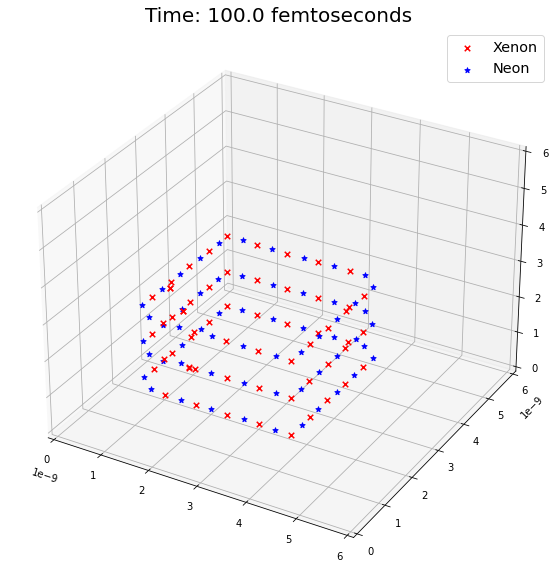

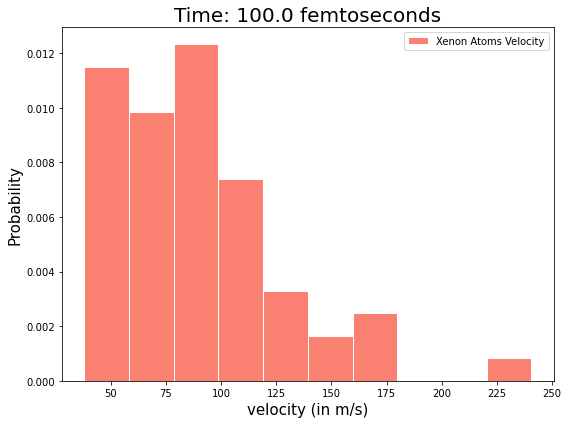

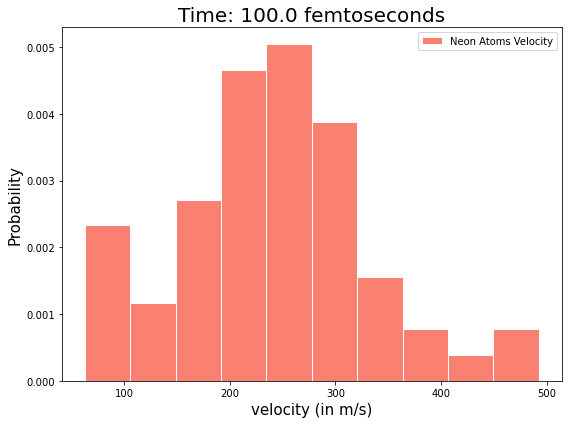

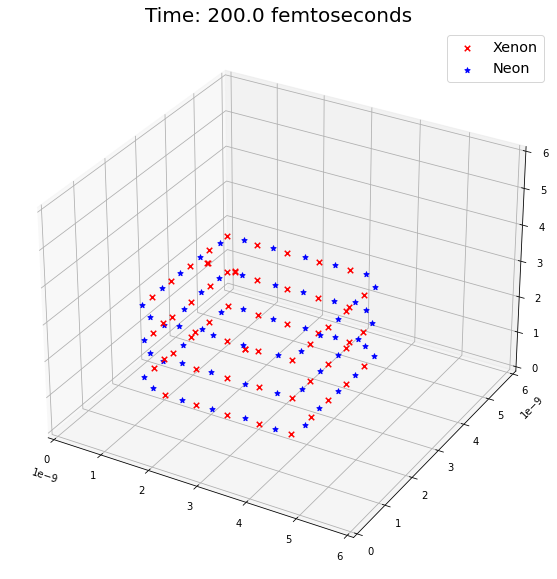

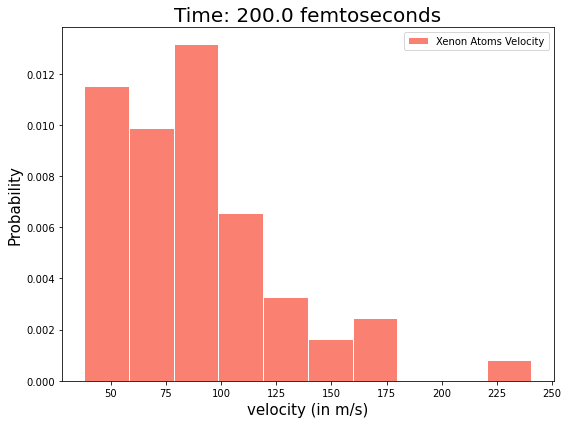

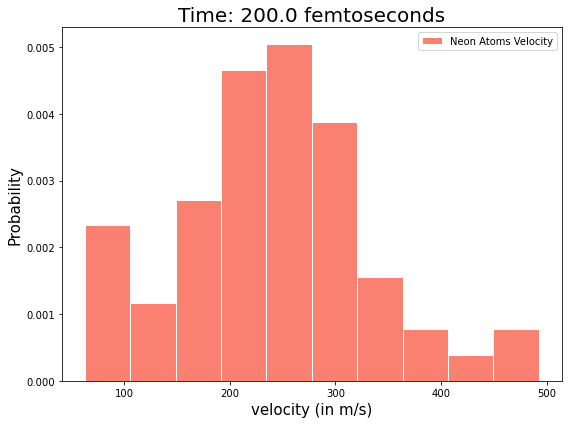

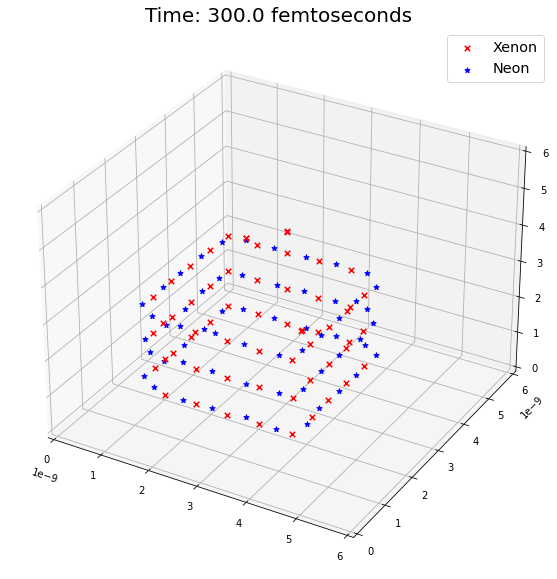

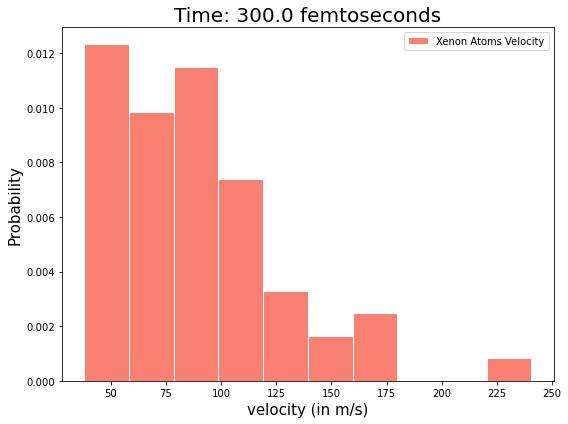

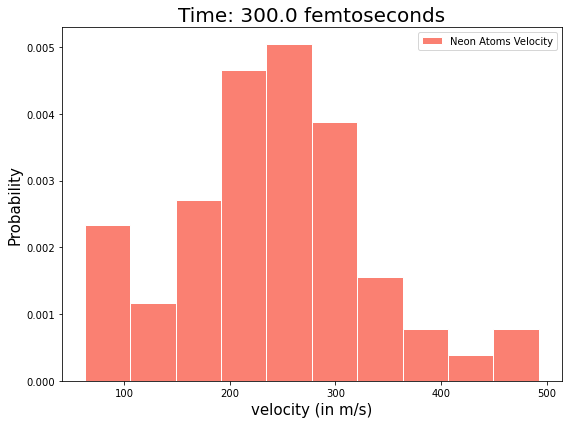

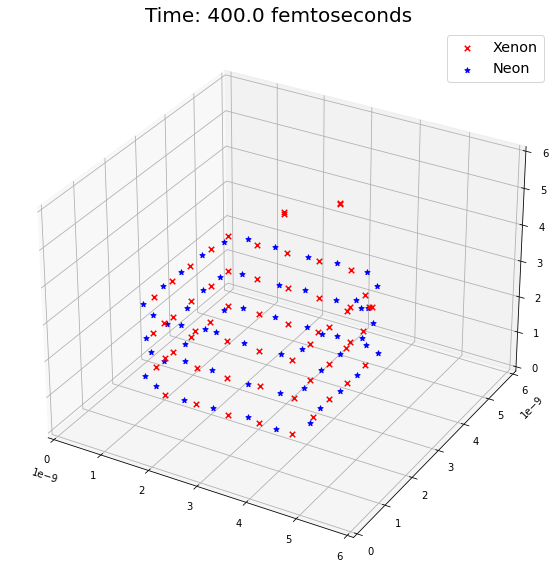

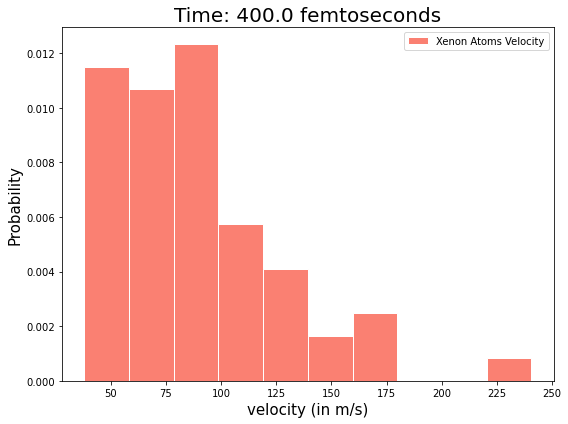

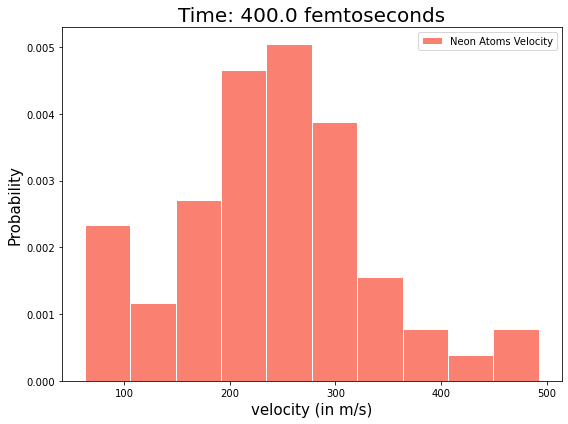

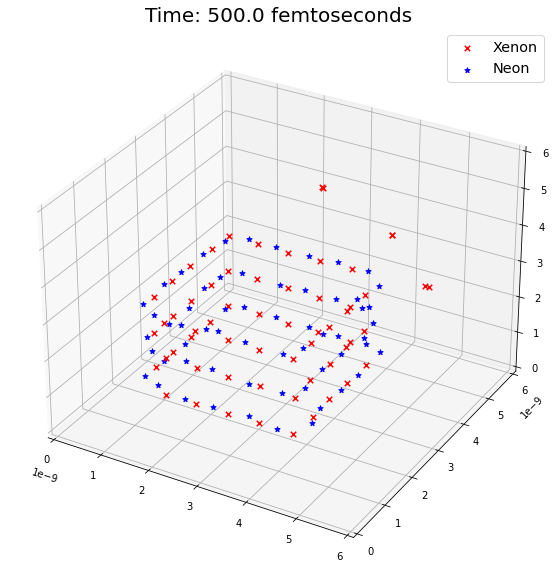

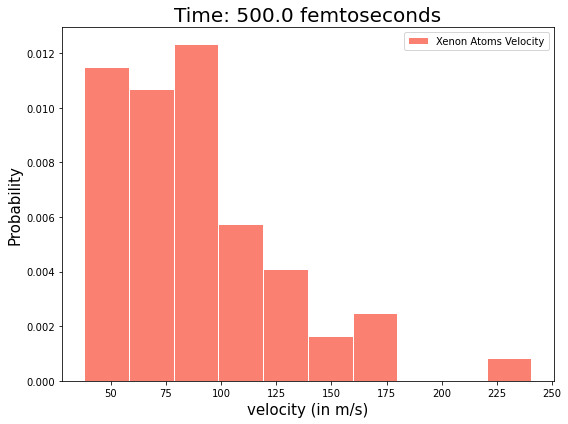

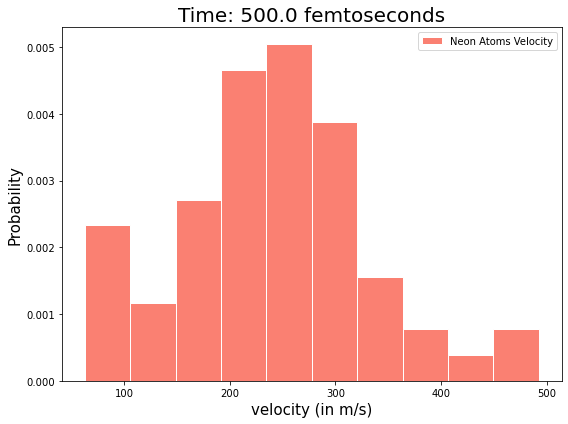

In [18]:
# Analysing the progression in system (for 200 femtoseconds i.e. 0.2 picoseconds)

time, n60, coll60, E60 = collision(v_x_60, v_n_60)

In [35]:
# Analysing the progression in system (for 500 femtoseconds i.e. 0.5 picoseconds)

print("The total number of collisions in", round(time/(10**-15), 3), "femtoseconds is", n60)

The total number of collisions in 500.0 femtoseconds is 36887


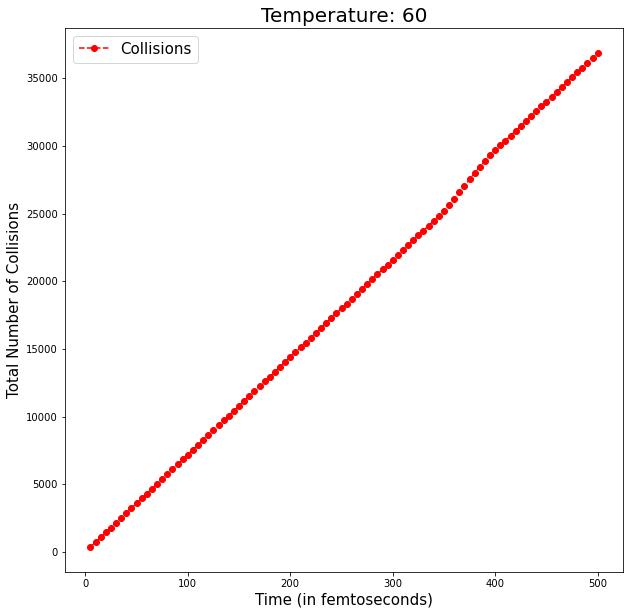

In [21]:
# Number of collisions vs time

y_60 = coll60
x_60 = np.linspace(0, round(time/(10**-15), 3), len(coll60))
plt.figure(figsize=(10,10))
plt.plot(x_60[1:], y_60[1:], color="r", marker="o", linestyle="--", label="Collisions")
plt.xlabel("Time (in femtoseconds)", fontsize=15)
plt.ylabel("Total Number of Collisions", fontsize=15)
plt.title("Temperature: 60", fontsize=20)
plt.legend(loc="upper left", fontsize=15)
plt.show()

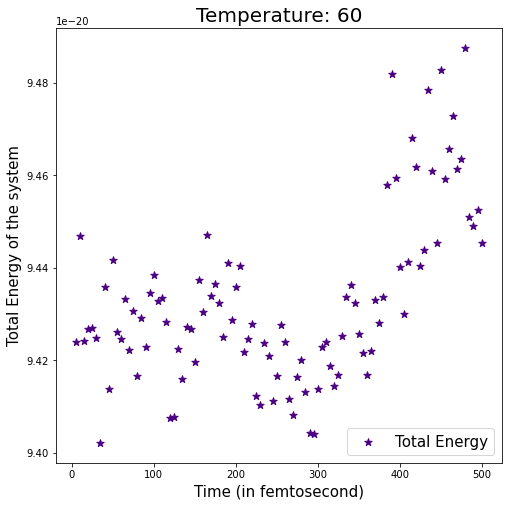

In [22]:
# Energy of system as a function of time

y_60 = E60
x_60 = np.linspace(0, round(time/(10**-15), 3), len(E60))
plt.figure(figsize=(8,8))
plt.scatter(x_60[1:], y_60[1:], label="Total Energy", color="indigo", marker="*", s=60)
plt.xlabel("Time (in femtosecond)", fontsize=15)
plt.ylabel("Total Energy of the system", fontsize=15)
plt.title("Temperature: 60", fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.show()

# At T = 750

In [23]:
# Resetting the coordinates to orginal setting:

r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

In [24]:
# Resetting the velocities to orginal setting:

Temp = [60, 750, 2000] 

# At T = 750

v_n_750 = velocity_extraction(N_n, m_n, Temp[1])
v_x_750 = velocity_extraction(N_x, m_x, Temp[1])

v_n_750 = vector(v_n_750)
v_x_750 = vector(v_x_750)

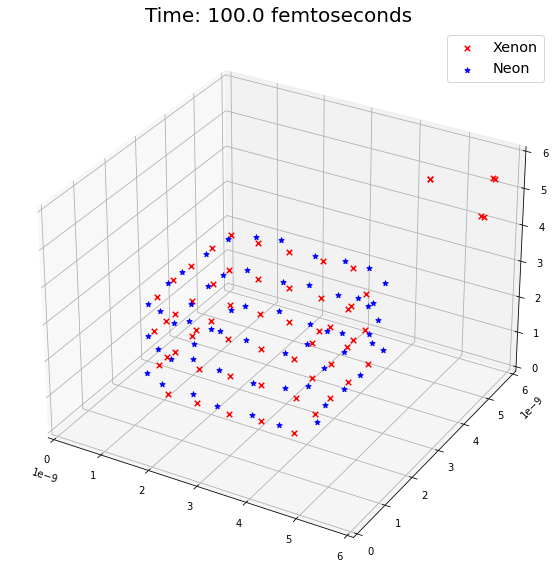

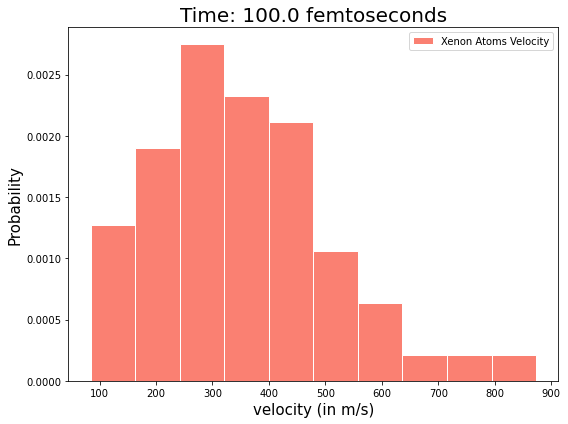

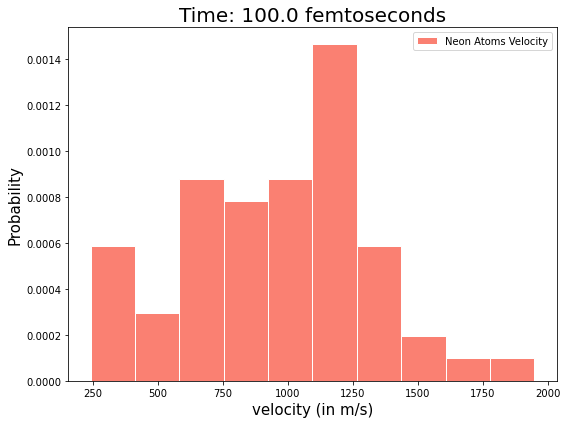

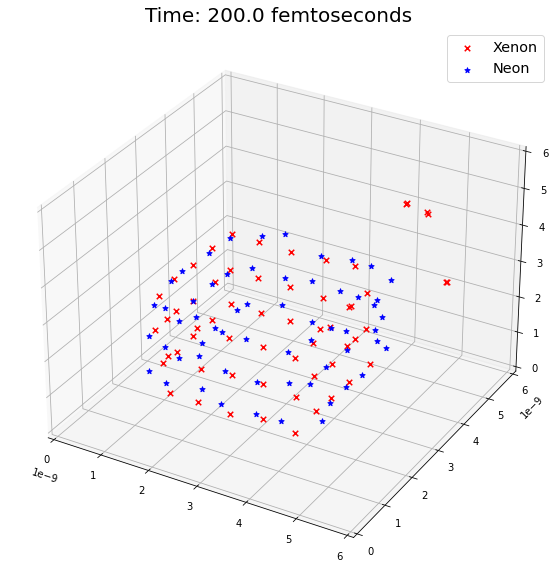

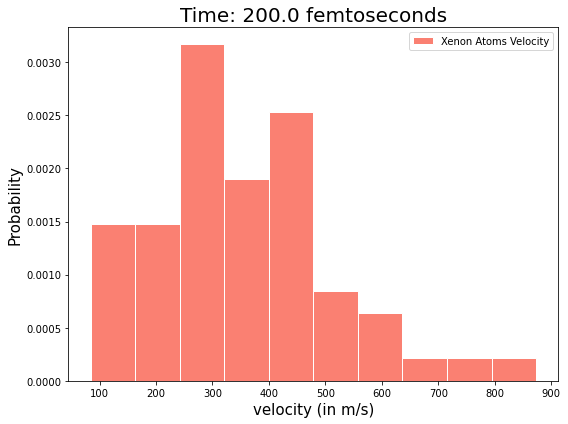

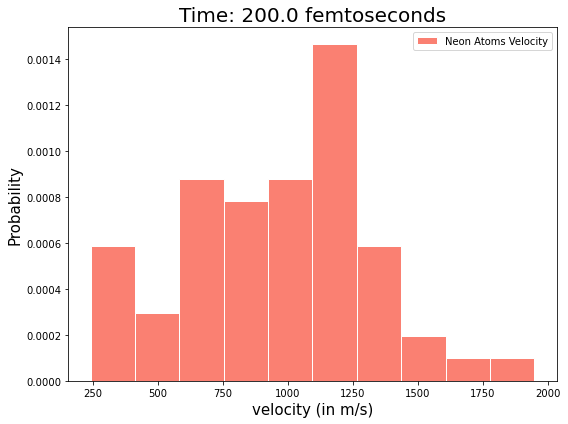

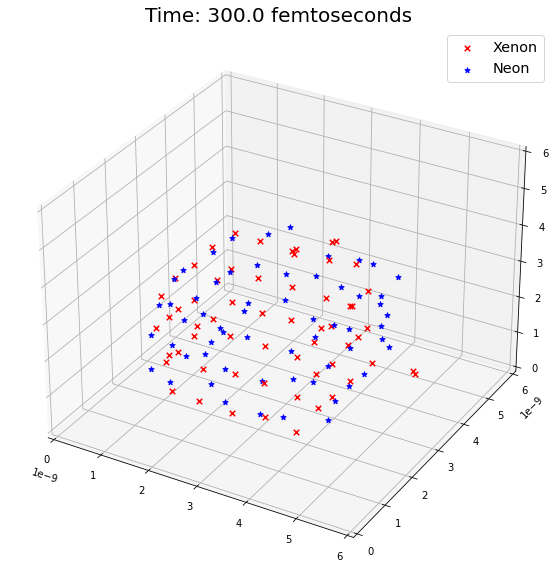

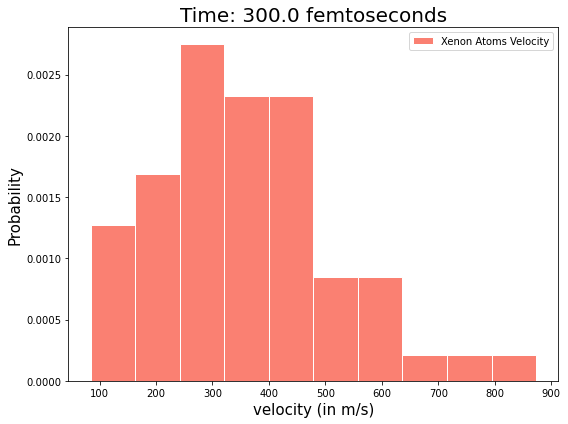

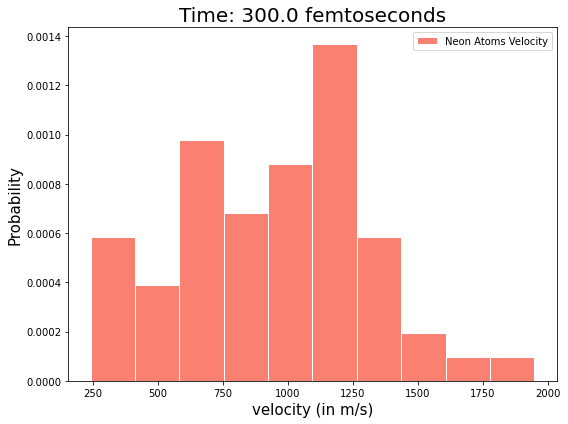

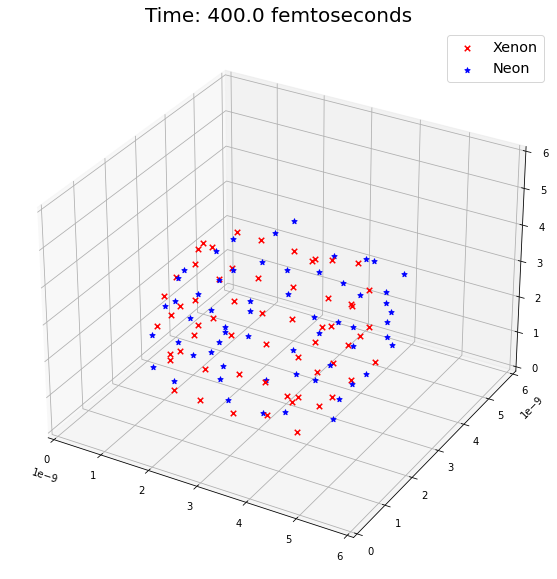

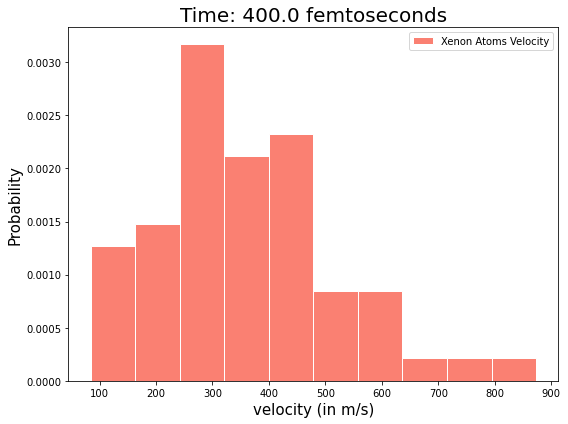

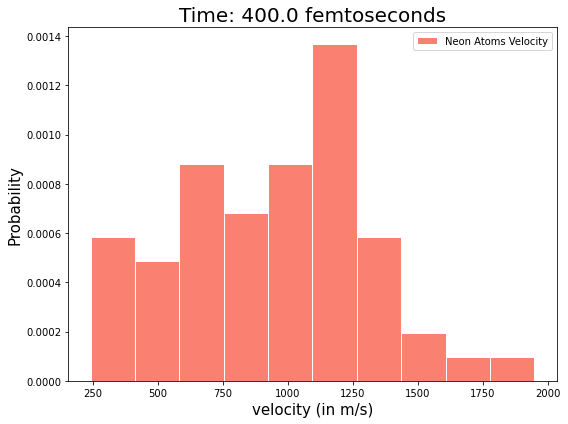

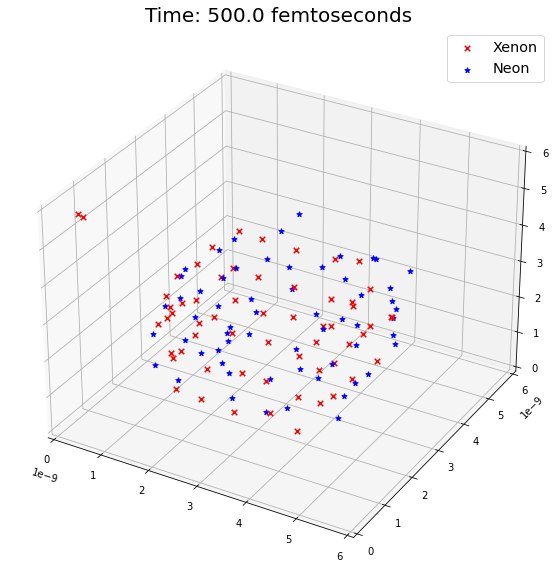

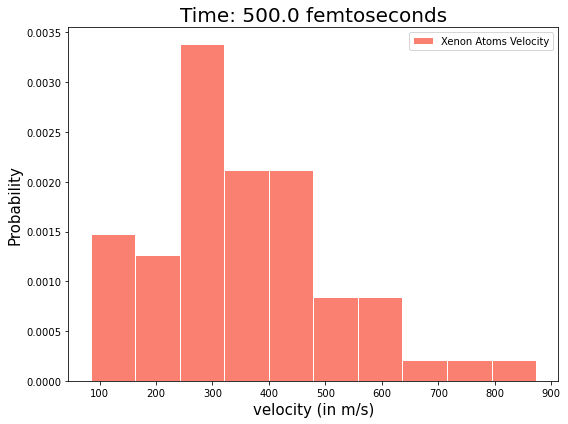

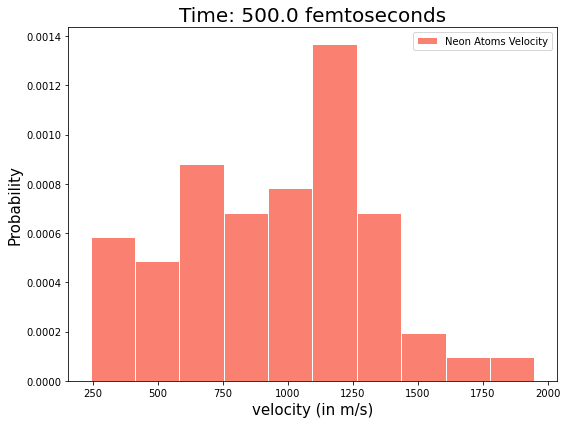

In [25]:
# Analysing the progression in system (for 500 femtoseconds i.e. 0.5 picoseconds)

time, n750, coll750, E750 = collision(v_x_750, v_n_750)

In [34]:
print("The total number of collisions in", round(time/(10**-15), 3), "femtoseconds is", n750)

The total number of collisions in 500.0 femtoseconds is 36145


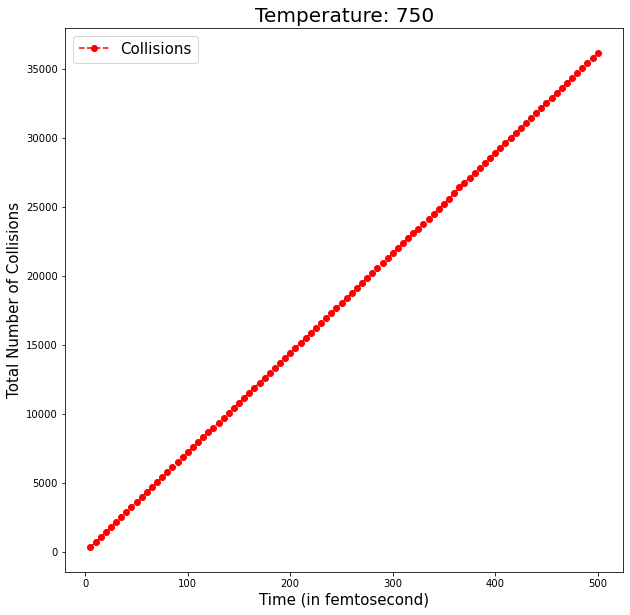

In [36]:
# Number of collisions vs time

y_750 = coll750
x_750 = np.linspace(0, round(time/(10**-15), 3), len(coll750))
plt.figure(figsize=(10,10))
plt.plot(x_750[1:], y_750[1:], color="r", marker="o", linestyle="--", label="Collisions")
plt.xlabel("Time (in femtosecond)", fontsize=15)
plt.ylabel("Total Number of Collisions", fontsize=15)
plt.title("Temperature: 750", fontsize=20)
plt.legend(loc="upper left", fontsize=15)
plt.show()

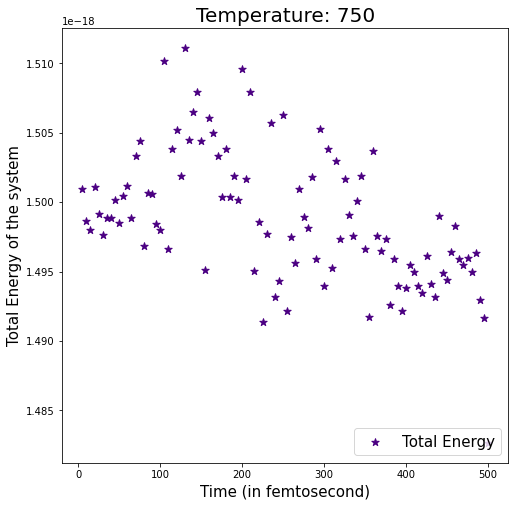

In [37]:
# Total Energy vs time

y_750 = E750
x_750 = np.linspace(0, round(time/(10**-15), 3), len(E750))
plt.figure(figsize=(8,8))
plt.scatter(x_750[1:], y_750[1:], label="Total Energy", color="indigo", marker="*", s=60)
plt.xlabel("Time (in femtosecond)", fontsize=15)
plt.ylabel("Total Energy of the system", fontsize=15)
plt.title("Temperature: 750", fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.show()

# At T = 2000

In [38]:
# Resetting the coordinates to orginal setting:

r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

In [39]:
# Resetting the velocities to orginal setting:

Temp = [60, 750, 2000] 

# At T = 2000

v_n_2000 = velocity_extraction(N_n, m_n, Temp[2])
v_x_2000 = velocity_extraction(N_x, m_x, Temp[2])

v_n_2000 = vector(v_n_2000)
v_x_2000 = vector(v_x_2000)

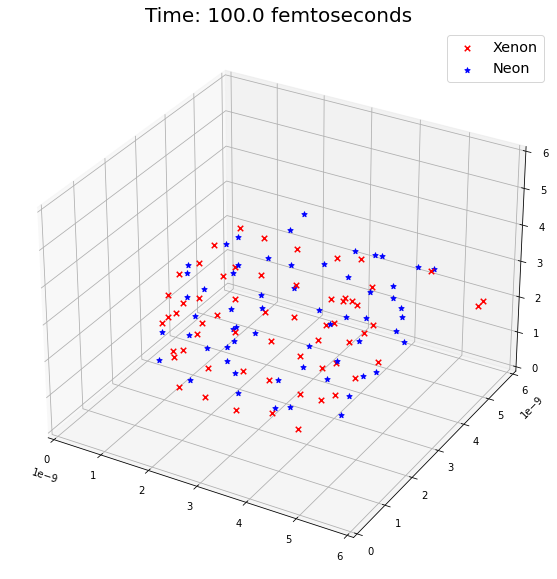

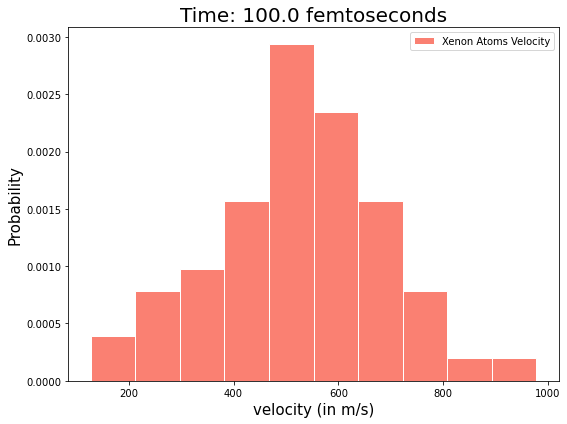

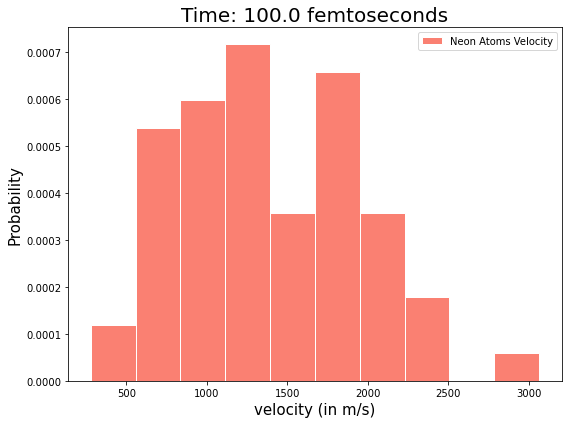

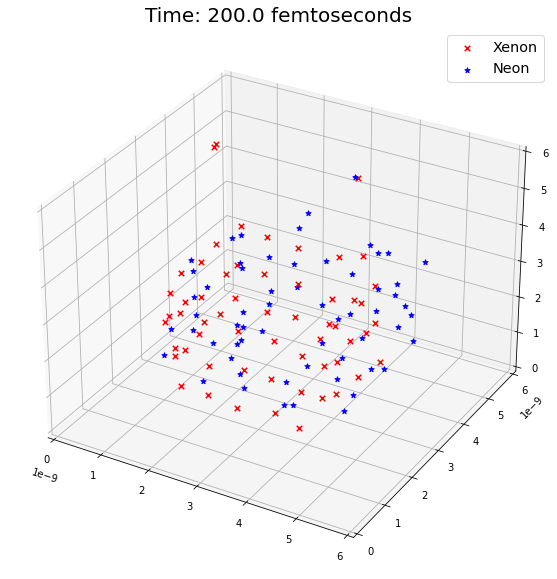

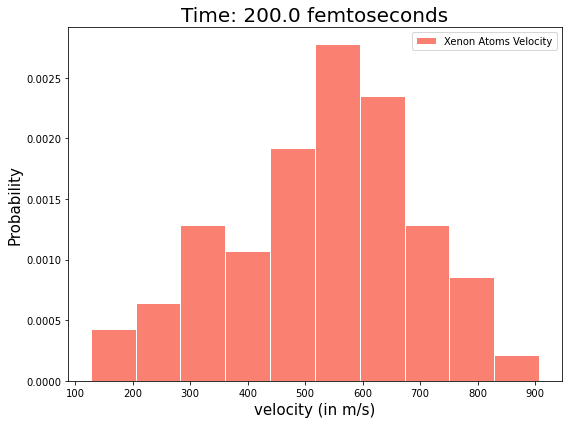

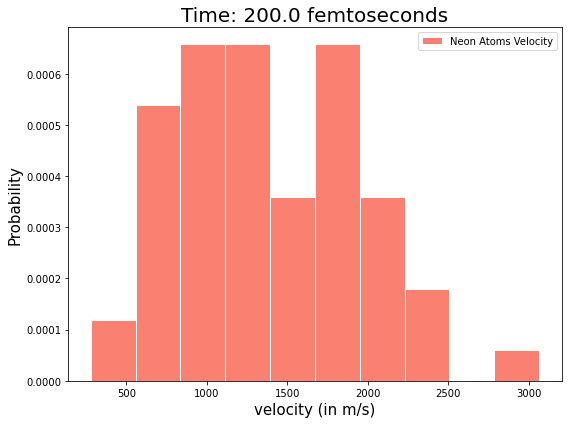

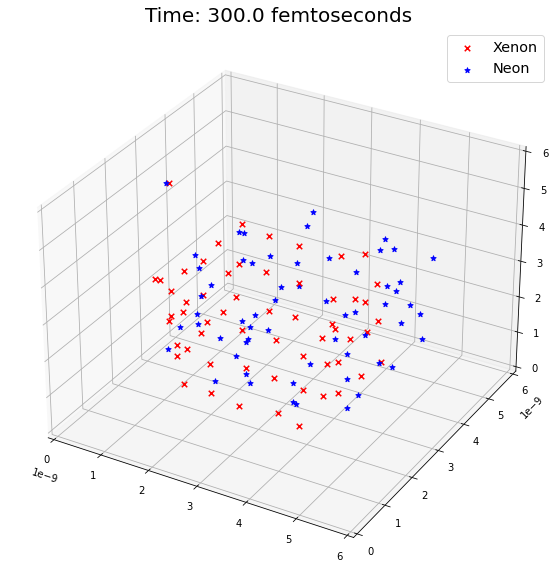

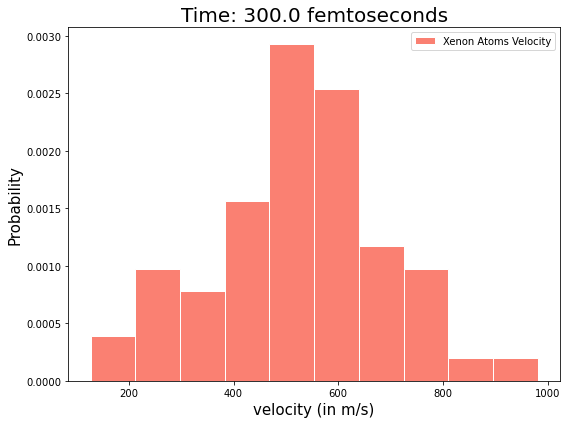

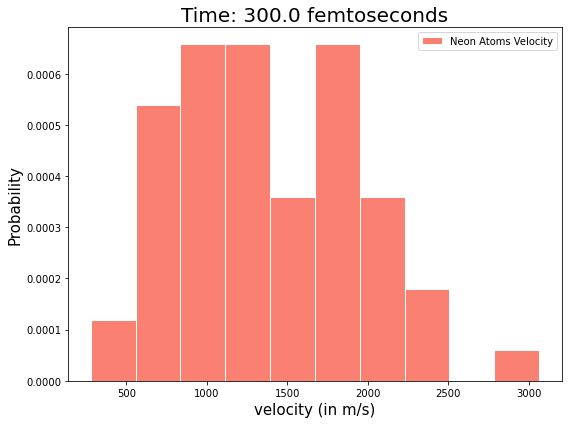

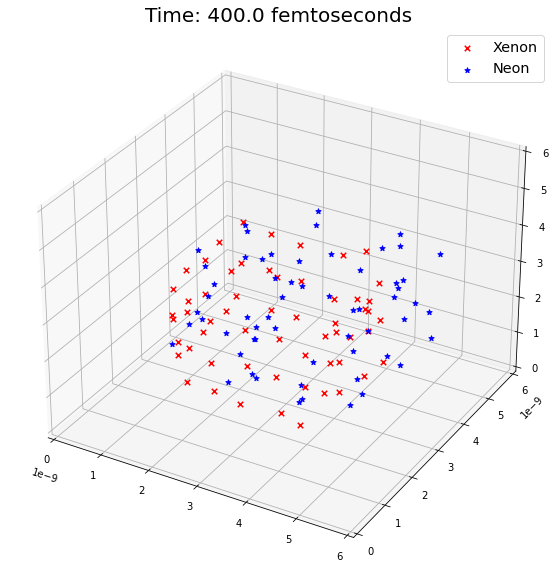

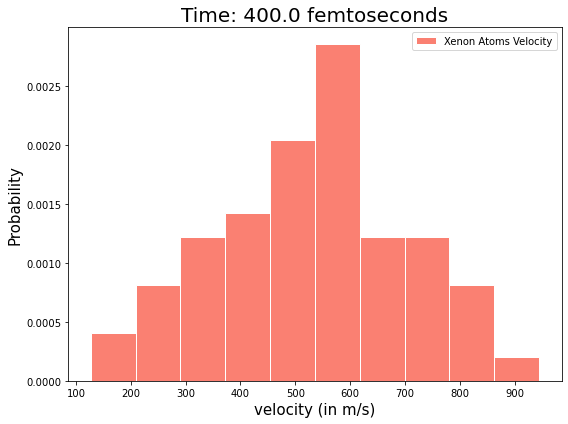

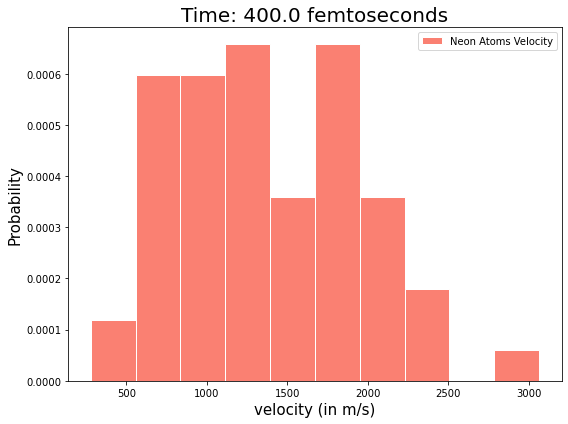

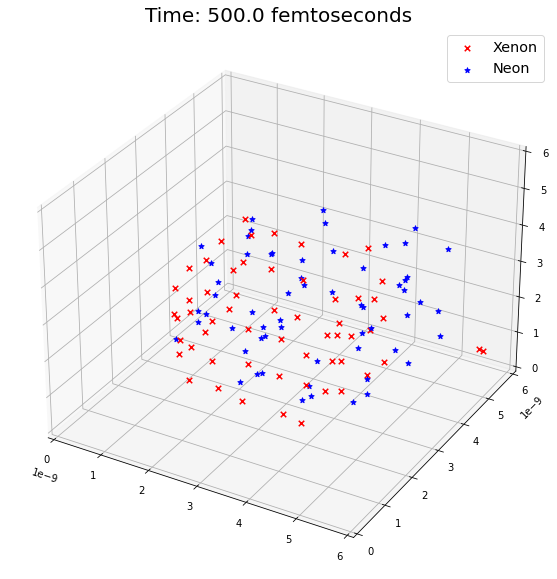

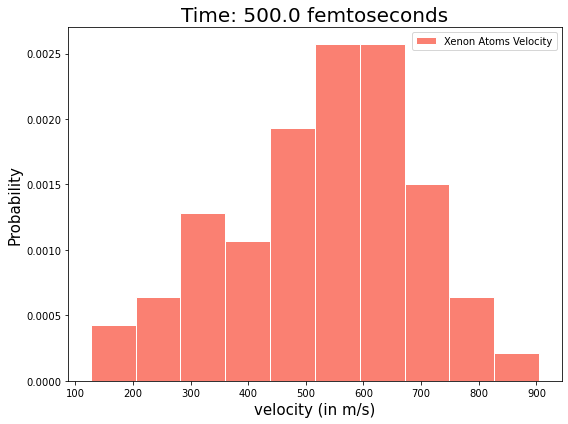

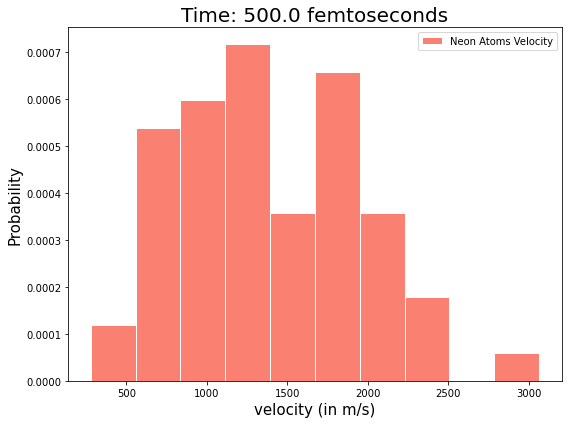

In [32]:
# Analysing the progression in system (for 200 femtoseconds i.e. 0.2 picoseconds)

time, n2000, coll2000, E2000 = collision(v_x_2000, v_n_2000)

In [40]:
print("The total number of collisions in", round(time/(10**-15), 3), "femtoseconds is", n2000)

The total number of collisions in 500.0 femtoseconds is 30333


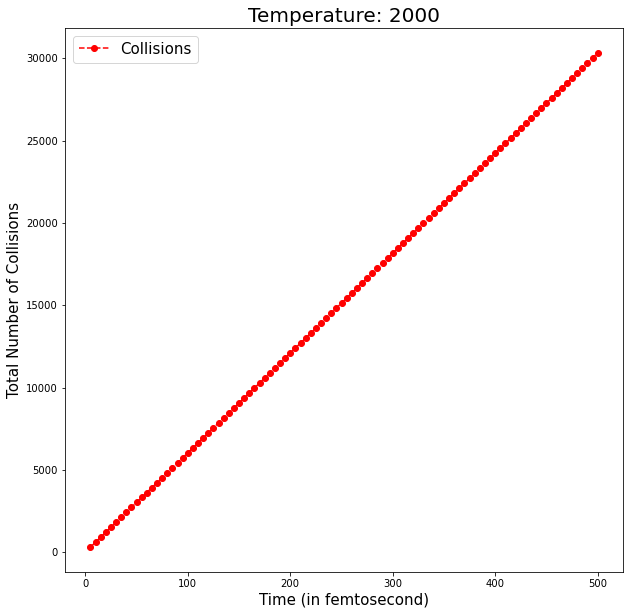

In [41]:
# Number of collisions vs time

y_2000 = coll2000
x_2000 = np.linspace(0, round(time/(10**-15), 3), len(coll2000))
plt.figure(figsize=(10,10))
plt.plot(x_2000[1:], y_2000[1:], color="r", marker="o", linestyle="--", label="Collisions")
plt.xlabel("Time (in femtosecond)", fontsize=15)
plt.ylabel("Total Number of Collisions", fontsize=15)
plt.title("Temperature: 2000", fontsize=20)
plt.legend(loc="upper left", fontsize=15)
plt.show()

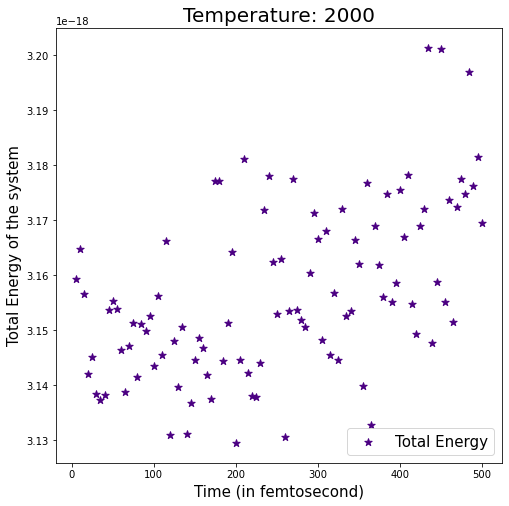

In [42]:
# Total Energy vs time

y_2000 = E2000
x_2000 = np.linspace(0, round(time/(10**-15), 3), len(E2000))
plt.figure(figsize=(8,8))
plt.scatter(x_2000[1:], y_2000[1:], label="Total Energy", color="indigo", marker="*", s=60)
plt.xlabel("Time (in femtosecond)", fontsize=15)
plt.ylabel("Total Energy of the system", fontsize=15)
plt.title("Temperature: 2000", fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.show()

### In order to compute the reactive collision cross section by assuming that only one out of two neon + xenon collisions is reactive, we consider the following things based on given problem at hand:
<br>

<font size=3 color="navy">

* There is no reaction between two xenon and two neon atoms.
<br>
    
* Since, only one of two collisions between xenon and neon atoms lead to reaction *(assuming some sort of reaction occurs)* we will be taking into account all the collisions and consider only half of these *(50% probability)* that there occurs a reaction.
    
</font>

### Hence, we will be creating a new function called *`collision_reactive`* which will have minor modifications as compared to already existing *`collision`* function.

In [60]:
#Defining a collision function

def collision_reactive(v_x_60, v_n_60, delta=1e-14, iterations=100, m_x=m_x, m_n=m_n, r_x=r_x, r_n=r_n, sigma_n=sigma_n, sigma_x=sigma_x):

    n_iterations = iterations # No. of iterations
    dt = delta  #Time-step
    iterate = 0
    coll = [0] # collision vector
    n_coll = 0 # collision counter
    E = []     # Energy 
    E.append(kinetic(v_x_60, m_x) + kinetic(v_n_60, m_n))
    #print(E)        
    time = 0
    #label_i = "Time: 0 ps"
    #plot_func1(r_x, r_n, label_i)
    t = [0]
    for z in range(n_iterations):
        iterate = iterate + 1
        for i in range(len(r_x)):
            #print(i)
            #print("r_x:", r_x[i])
            r_x[i] = r_x[i] + (v_x_60[i])*dt 
            #print("r_x:", r_x[i])
            #print("r_n:", r_n[i])
            r_n[i] = r_n[i] + (v_n_60[i])*dt
            #print("r_n:", r_n[i])

            if any(elem >= 6e-9 for elem in r_x[i]) or any(elem <= 0 for elem in r_x[i]): # Wall collision for xenon
                #print("r_x collides wall")
                #print("v_x_60s:", v_x_60[i])
                n = normal(r_x[i])
                v_x_60[i] = v_x_60[i] - 2*(np.dot(v_x_60[i], n))*n
                #print("v_x_60e:", v_x_60[i])
                r_x[i] = r_x[i] + (v_x_60[i])*dt
            else:
                pass

            if any(elem >= 6e-9 for elem in r_n[i]) or any(elem <= 0 for elem in r_n[i]): # Wall collision for neon
                #print("r_n collides wall")
                #print("v_n_60s:", v_n_60[i])
                n = normal(r_n[i])
                v_n_60[i] = v_n_60[i] - 2*(np.dot(v_n_60[i], n))*n
                #print("v_n_60e:", v_n_60[i])
                r_n[i] = r_n[i] + (v_n_60[i])*dt                
            else:
                pass

            for j in range(len(r_n)): # Neon and xenon collision


                if distance(r_x[i], r_n[j]) <= sigma_n + sigma_x: 
                    #print("r_x and r_n collides")
                    r12 = unit_vector(r_x[i], r_n[j])
                    #print("Unit Vector:", r12)
                    F = ((-2*m_n*m_x)/(m_n+m_x))*(np.dot((v_x_60[i] - v_n_60[j]), r12))*r12
                    #print("F", F)
                    v_x_60[i] = v_x_60[i] + F/m_x
                    #print("r_x_initial", r_x[i])
                    r_x[i] = r_x[i] + (v_x_60[i])*dt
                    #print("r_x_final", r_x[i])
                    v_n_60[j] = v_n_60[j] - F/m_n
                    r_n[j] = r_n[j] + (v_n_60[j])*dt
                    n_coll = n_coll + 1


                else:
                    pass

                for k in range(len(r_x)): # Neon and xenon collision

                    if distance(r_n[i], r_x[k]) <= sigma_n + sigma_x:

                        r12 = unit_vector(r_n[i], r_x[k])
                        F = ((-2*m_n*m_x)/(m_n+m_x))*(np.dot((v_n_60[i] - v_x_60[k]), r12))*r12                                       
                        v_n_60[i] = v_n_60[i] + F/m_n
                        r_n[i] = r_n[i] + (v_n_60[i])*dt
                        v_x_60[k] = v_x_60[k] - F/m_x
                        r_x[k] = r_x[k] + (v_x_60[k])*dt
                        n_coll = n_coll + 1


                    else:
                        pass



                for l in range(len(r_x)): # Collision between Xenon atoms

                    if np.array_equal(r_x[i], r_x[l]):
                        pass

                    elif distance(r_x[i], r_x[l]) <= 2*sigma_x:

                        r12 = unit_vector(r_x[i], r_x[l])
                        F = ((-2*m_x*m_x)/(m_x+m_x))*(np.dot((v_x_60[i] - v_x_60[l]), r12))*r12                                       
                        v_x_60[i] = v_x_60[i] + F/m_x
                        r_x[i] = r_x[i] + (v_x_60[i])*dt
                        v_x_60[l] = v_x_60[l] - F/m_x
                        r_x[l] = r_x[l] + (v_x_60[l])*dt
                        

                    else:
                        pass   

                for m in range(len(r_x)):

                    if np.array_equal(r_n[i], r_n[m]): # Collision between Neon atoms
                        pass

                    elif distance(r_n[i], r_n[m]) <= 2*sigma_n:

                        r12 = unit_vector(r_n[i], r_n[m])
                        F = ((-2*m_n*m_n)/(m_n+m_n))*(np.dot((v_n_60[i] - v_n_60[m]), r12))*r12                                       
                        v_n_60[i] = v_n_60[i] + F/m_n
                        r_n[i] = r_n[i] + (v_n_60[i])*dt
                        v_n_60[m] = v_n_60[m] - F/m_n
                        r_n[m] = r_n[m] + (v_n_60[m])*dt
                        

                    else:
                        pass  

        time = time + dt
        t.append(time)
        coll.append(n_coll)
        #l = round(time/(10**-15), 3)
        #l = str(l)
        E.append(kinetic(v_x_60, m_x) + kinetic(v_n_60, m_n))
        #print(E)
        #label = "Time: " + l + " femtoseconds"
        #l = round(time/(10**-15), 3)
        #if l % gn == 0:
         #   plot_func1(r_x, r_n, label)
         #   velocity_plot(v_x_60, label, "Xenon Atoms Velocity")
         #   velocity_plot(v_n_60, label, "Neon Atoms Velocity")
        #else:
            #pass
        
    return (time, n_coll, coll, E)

# T = 60

In [61]:
# Resetting coordinates and velocity distributions

r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

Temp = [750, 60, 2000] 

# At T = 60

v_n_60 = velocity_extraction(N_n, m_n, Temp[1])
v_x_60 = velocity_extraction(N_x, m_x, Temp[1])

v_n_60 = vector(v_n_60)
v_x_60 = vector(v_x_60)

In [62]:
# Analysing the progression in system (for 1000 femtoseconds i.e. 1 pico seconds)

time, n60r, coll60r, E60r = collision_reactive(v_x_60, v_n_60)

In [63]:
print("The total number of reactive collisions is", round(n60r/2), "for an average kinetic energy of", sum(E60r)/len(E60r), "in", round(time/(10**-15), 3), "femtoseconds")

The total number of reactive collisions is 93 for an average kinetic energy of 1.2811528997191702e-19 in 1000.0 femtoseconds


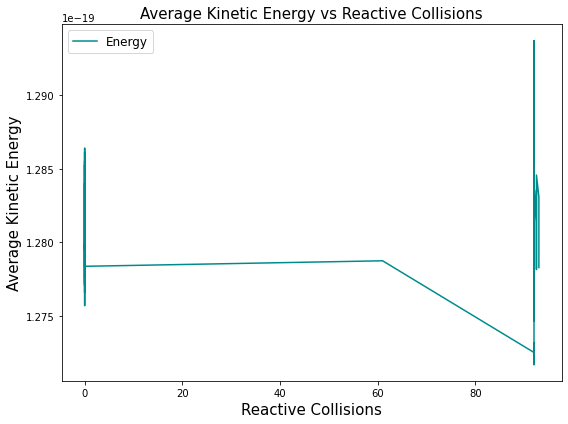

In [79]:
plt.figure(figsize=(8, 6))
plt.plot([elem/2 for elem in coll60r], E60r, color="darkcyan", label="Energy")
plt.xlabel("Reactive Collisions", fontsize=15)
plt.ylabel("Average Kinetic Energy", fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.title("Average Kinetic Energy vs Reactive Collisions", fontsize=15)
plt.tight_layout();

# T = 750

In [68]:
# Resetting coordinates and velocity distributions

r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

Temp = [60, 750, 2000] 

# At T = 750

v_n_750 = velocity_extraction(N_n, m_n, Temp[1])
v_x_750 = velocity_extraction(N_x, m_x, Temp[1])

v_n_750 = vector(v_n_750)
v_x_750 = vector(v_x_750)

# Analysing the progression in system (for 1000 femtoseconds i.e. 1 pico seconds)

time, n750r, coll750r, E750r = collision_reactive(v_x_750, v_n_750)

In [69]:
print("The total number of reactive collisions is", round(n750r/2), "for an average kinetic energy of", sum(E750r)/len(E750r), "in", round(time/(10**-15), 3), "femtoseconds")

The total number of reactive collisions is 1220 for an average kinetic energy of 1.2458085671546579e-18 in 1000.0 femtoseconds


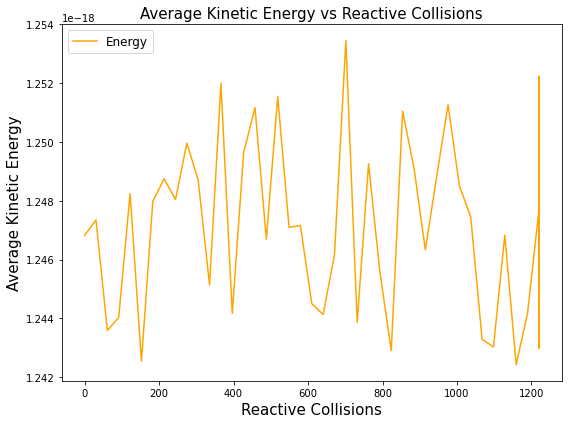

In [76]:
plt.figure(figsize=(8, 6))
plt.plot([elem/2 for elem in coll750r], E750r, color="orange", label="Energy")
plt.xlabel("Reactive Collisions", fontsize=15)
plt.ylabel("Average Kinetic Energy", fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.title("Average Kinetic Energy vs Reactive Collisions", fontsize=15)
plt.tight_layout();

# T = 2000

In [80]:
# Resetting coordinates and velocity distributions

r_x = []
r_n = []

# Placing atoms at an initial position

initial_position(1e-9, 1e-9)
initial_position(1e-9, 2e-9)
initial_position(1e-9, 3e-9)

Temp = [60, 2000, 750] 

# At T = 2000

v_n_2000 = velocity_extraction(N_n, m_n, Temp[1])
v_x_2000 = velocity_extraction(N_x, m_x, Temp[1])

v_n_2000 = vector(v_n_2000)
v_x_2000 = vector(v_x_2000)

# Analysing the progression in system (for 200 femtoseconds i.e. 0.2 pico seconds)

time, n2000r, coll2000r, E2000r = collision_reactive(v_x_2000, v_n_2000)

In [81]:
print("The total number of reactive collisions is", round(n2000r/2), "for an average kinetic energy of", sum(E2000r)/len(E2000r), "in", round(time/(10**-15), 3), "femtoseconds")

The total number of reactive collisions is 0 for an average kinetic energy of 3.1622270861261715e-18 in 1000.0 femtoseconds


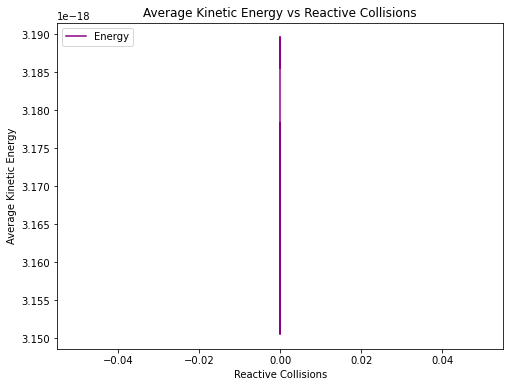

In [84]:
plt.figure(figsize=(8, 6))
plt.plot([elem/2 for elem in coll2000r], E2000r, color="darkmagenta", label="Energy")
plt.xlabel("Reactive Collisions")
plt.ylabel("Average Kinetic Energy")
plt.legend(loc="upper left")
plt.title("Average Kinetic Energy vs Reactive Collisions");

# Comments:
<font size=3>
<br>
    
In the given assignment following deductions and findings were made:
</font>

* The ***Boltzmann-Maxwell distribution*** of velocities **does exist** even when the molecules start colliding with one another and the corresponding histogram plot showcases the same.
<br>

* We note that the number of total collisions go on increasing as a function of time which can also be seen from the plot.
<br>

* Here, we have taken a step size of ***5 * 10<sup>-15</sup>*** seconds which is **5 femtoseconds** ***(i.e., 0.005 picosecond)*** and carried out ***100 iterations*** ***(i.e., 0.5 picoseconds)*** for the same while analysing the progression of system.
<br>

* Also, the step-size taken for analysis ***might not*** have been the perfect for analysing the problem at hand. In order to analyse our model with ***higher confidence levels***, we might need to perform the same simlualtion using ***different time-steps*** for best possible results.
<br>

* Having said that, this is a very small number to compute or analyse the model in general and we need ***atleast 10000 iterations*** to get a more clear picture of the trend i.e., 50 picoseconds for analysis.
<br>

* Furthermore, we have taken an alternative step-size of **10 femtosendonds** in calculating the ***reactive collisions*** at various temperatures. We have taken 100 **iterations** for the subsequent analysis as well and thereby analysing for **1 picosecond**.
<br>

* The overall kinetic energy of system is a function of collision between molecules and the size of the enclosed container. As discussed due to a very small number of iterations carried out, it is difficult to comment on the trend of Energy as a function of time.
<br>

* The number of **reactive collisions** ***increases*** as a function of **Temperature**. Also, we can see when we **increase the step size from 5 femtoseconds to 10 femtoseconds**, the average kinetic energy has a higher fluctuation as compared to that of 5 femtoseconds used for initial analysis. This indicates that system has become unstable as the time step-size was increased. 
<br>

* This fluctuation is **very evident** while doing analysis for ***question 1.6 for T = 2000*** (extremely large temperatures). The time-step is so large for T = 2000 that collisions are skipped and molecules move past other as per the simulation without colliding with one another.
<br>

* Hence, we can also conclude that keeping the **same time-step** for **different values of Temperature** is **not** a good idea and very likely to give correct results at one value of Temperature but False results for a different value of Temperature.